## Project Title:

Supermart Sales Analysis and Predictive Modeling

## DATE 

06-02-2024rocesses.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Timestamp
import warnings 
import plotly.graph_objects as go
import plotly.offline as pyo 
import plotly.io as pio
import sklearn
import plotly.express as ex
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("C:/Users/Biggest/Downloads/archive/supermart sales.csv")

In [3]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


In [4]:
data.tail()

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu
9993,OD9994,Ganesh,Food Grains,Atta & Flour,Tirunelveli,4/17/2018,West,1034,0.28,165.44,Tamil Nadu


# DATA CLEANING

In [5]:
# helps to understand the data type and information about data, including the number of records in each column, data having null or not null, Data type, the memory usage of the dataset

data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB


# 
info shows that we have no null value in the dataset as everything has 9994 datapoint in each colunm

In [6]:
data.nunique()

Order ID         9994
Customer Name      50
Category            7
Sub Category       23
City               24
Order Date       1236
Region              5
Sales            1989
Discount           26
Profit           8380
State               1
dtype: int64

# observations;
nunique shows that for every 994 datapoints in each categories there are;
- 9994 unique datapoints in OrderId
- 50 unique customer name
- 7 unique categories
- 23 unique Sub categories
- 24 unique cities
- 1236 unique order date
- 5 unique regions
- 1989 unique sales
- 26 unique discounts
- 8380 unique profits

In [7]:
#checking for missing values in each category/colunm

data.isnull().sum()

Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
dtype: int64

In [8]:
data

,Order ID,Customer Name,Category,Sub Category,City,Order Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


# 
to make our data cleaning easier we need to replace the space(s) in colunm names with underscore

In [9]:
data.columns = data.columns.str.replace(' ', '_') # Replacing the space(s) in the colunm names with underscore(_)
data

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,11-08-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,11-08-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,06-12-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,10-11-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,10-11-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,07-12-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


#
we can from order date that our data is not clean as some dates are seperated with ' - ' while others are seperated with ' / '
since we need the colunm for our analysis, we need to clean the colunm. to do that we need to;
- check the uniqueness in the colunm
- search for them in the colunm 
- replace them with the fomart we choose to use

In [10]:
data['Order_Date'].unique() #check the uniqueness in the colunm

array(['11-08-2017', '06-12-2017', '10-11-2016', ..., '3/16/2015',
       '8/29/2016', '04-06-2017'], dtype=object)

#
search for them in the colunm 

In [11]:
searchfor = ['/']
data[data.Order_Date.str.contains('|'.join(searchfor))]


,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
12,OD13,Sharon,Snacks,Cookies,Dindigul,4/15/2018,South,1659,0.19,315.21,Tamil Nadu
14,OD15,Sundar,"Eggs, Meat & Fish",Chicken,Kanyakumari,11/22/2016,Central,831,0.22,207.75,Tamil Nadu
15,OD16,Ramesh,Oil & Masala,Edible Oil & Ghee,Krishnagiri,11/22/2016,Central,1440,0.11,100.80,Tamil Nadu
17,OD18,Arutra,Beverages,Health Drinks,Bodi,5/13/2015,West,1617,0.19,113.19,Tamil Nadu
18,OD19,Haseena,"Eggs, Meat & Fish",Mutton,Tenkasi,8/27/2015,West,1757,0.35,386.54,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9985,OD9986,Shree,"Eggs, Meat & Fish",Mutton,Kanyakumari,11/13/2016,West,1286,0.30,475.82,Tamil Nadu
9987,OD9988,Ganesh,Fruits & Veggies,Fresh Vegetables,Theni,10/19/2015,West,1350,0.15,67.50,Tamil Nadu
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,12/24/2015,West,945,0.16,359.10,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,10/16/2018,West,1659,0.15,597.24,Tamil Nadu


#
since the datapoint with the ' / ' is much(5952 rows), we wont be using the simple function-

data["colunm name"].replace({"Name under colunm": "new name", "name under colunm": "new name"}, inplace=True)

since the colunm is a date/time colunm we will be using the datetimeframe format to change everything in the colunm to '-'


In [12]:
data['Order_Date'] = pd.to_datetime(data['Order_Date'], format='mixed')

data['Order_Date'] = data['Order_Date'].dt.strftime('%d-%m-%Y')

print(data)


     Order_ID Customer_Name           Category      Sub_Category         City  \
0         OD1        Harish       Oil & Masala           Masalas      Vellore   
1         OD2         Sudha          Beverages     Health Drinks  Krishnagiri   
2         OD3       Hussain        Food Grains      Atta & Flour   Perambalur   
3         OD4       Jackson   Fruits & Veggies  Fresh Vegetables   Dharmapuri   
4         OD5       Ridhesh        Food Grains   Organic Staples         Ooty   
...       ...           ...                ...               ...          ...   
9989   OD9990        Sudeep  Eggs, Meat & Fish              Eggs      Madurai   
9990   OD9991          Alan             Bakery          Biscuits  Kanyakumari   
9991   OD9992          Ravi        Food Grains              Rice         Bodi   
9992   OD9993          Peer       Oil & Masala            Spices   Pudukottai   
9993   OD9994        Ganesh        Food Grains      Atta & Flour  Tirunelveli   

      Order_Date Region  Sa

In [13]:
#check to confirm our data is now clean
data

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,12-07-2015,West,1195,0.26,71.70,Tamil Nadu
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu


#
checking for uniquess again to confirm the colunm is now clean

In [14]:

print(data.Order_Date.unique())

['08-11-2017' '12-06-2017' '11-10-2016' ... '16-03-2015' '29-08-2016'
 '06-04-2017']


#
the above shows the colunm is now free. we can now proceed with our analysis

# DATA REDUCTION

In [15]:
data1 = data.drop(['Order_ID'], axis = 1)


In [16]:
data1

,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State
0,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu
1,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu
2,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu
4,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu
...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu
9990,Alan,Bakery,Biscuits,Kanyakumari,12-07-2015,West,1195,0.26,71.70,Tamil Nadu
9991,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu
9992,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu


# Feature Engineering:Creating features

In [17]:
#Converting a timestamp colunm into string so we can extract 'Year as Yr', 'Month as Mth', 'Date as Dy'

df=data['Order_Date'].astype(str)

#extract 'Year as Yr', 'Month as Mth', 'Date as Dy'

data['Dy'] = df.apply(lambda x: x.split("-")[0])
data['Mth'] = df.apply(lambda x: x.split("-")[1])
data['Yr'] = df.apply(lambda x: x.split("-")[2])

#print our new data
data

,Order_ID,Customer_Name,Category,Sub_Category,City,Order_Date,Region,Sales,Discount,Profit,State,Dy,Mth,Yr
0,OD1,Harish,Oil & Masala,Masalas,Vellore,08-11-2017,North,1254,0.12,401.28,Tamil Nadu,08,11,2017
1,OD2,Sudha,Beverages,Health Drinks,Krishnagiri,08-11-2017,South,749,0.18,149.80,Tamil Nadu,08,11,2017
2,OD3,Hussain,Food Grains,Atta & Flour,Perambalur,12-06-2017,West,2360,0.21,165.20,Tamil Nadu,12,06,2017
3,OD4,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,11-10-2016,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,OD5,Ridhesh,Food Grains,Organic Staples,Ooty,11-10-2016,South,2355,0.26,918.45,Tamil Nadu,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,OD9990,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,24-12-2015,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,OD9991,Alan,Bakery,Biscuits,Kanyakumari,12-07-2015,West,1195,0.26,71.70,Tamil Nadu,12,07,2015
9991,OD9992,Ravi,Food Grains,Rice,Bodi,06-06-2017,West,1567,0.16,501.44,Tamil Nadu,06,06,2017
9992,OD9993,Peer,Oil & Masala,Spices,Pudukottai,16-10-2018,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


#
drop the 'Order_Date' colunm from the dataframe since we already have it splited into month date and year



In [18]:
#drop the 'Order_Date' colunm from the dataframe

data = data.drop(['Order_Date', 'Order_ID'], axis = 1)

In [19]:
data

,Customer_Name,Category,Sub_Category,City,Region,Sales,Discount,Profit,State,Dy,Mth,Yr
0,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,08,11,2017
1,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,08,11,2017
2,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,12,06,2017
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,11,10,2016
4,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,11,10,2016
...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,Tamil Nadu,24,12,2015
9990,Alan,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,Tamil Nadu,12,07,2015
9991,Ravi,Food Grains,Rice,Bodi,West,1567,0.16,501.44,Tamil Nadu,06,06,2017
9992,Peer,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,Tamil Nadu,16,10,2018


In [20]:
#checking for misspelt error in the 'Category' colunm
print(data.Category.unique())

['Oil & Masala' 'Beverages' 'Food Grains' 'Fruits & Veggies' 'Bakery'
 'Snacks' 'Eggs, Meat & Fish']


In [21]:
#checking for misspelt error in the 'Region' colunm
print(data.Region.unique())

['North' 'South' 'West' 'Central' 'East']


In [22]:
##checking for misspelt error in the 'Sub Category' colunm
data['Sub_Category'].unique()

array(['Masalas', 'Health Drinks', 'Atta & Flour', 'Fresh Vegetables',
       'Organic Staples', 'Fresh Fruits', 'Biscuits', 'Cakes',
       'Chocolates', 'Eggs', 'Cookies', 'Chicken', 'Edible Oil & Ghee',
       'Mutton', 'Soft Drinks', 'Dals & Pulses', 'Organic Vegetables',
       'Noodles', 'Organic Fruits', 'Fish', 'Spices', 'Rice',
       'Breads & Buns'], dtype=object)

#
The checkings above [20, 21, 22] shows that our data is all clean
now we can proceed to our analysis

# EDA(Exploratory Data Analysis)

In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sales,9994.0,1496.596158,577.559036,500.00,1000.0000,1498.00,1994.7500,2500.00
Discount,9994.0,0.226817,0.074636,0.10,0.1600,0.23,0.2900,0.35
Profit,9994.0,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95


#
describe() function gives all statistics summary of data. 
we can deduce from this function that

- standard deviation on SALES is 577.559036	, on DISCOUNT is 0.100000, and on PROFIT is 0.100000
- Our minimum SALES per day, all through the years is 500.000000, while minimum PROFIT made per day is 25.250000
- Maximum sales made in a day all through the years is 2,500 and MINIMUM is 1120.95
- 75% of our sales through the years ranges from 500 to 1994.75
- Discount positively affects sales and profit and the higher the discout the higher the sales
- Profit depends on sales 

In [24]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Customer_Name,9994,50,Amrish,227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,9994,7,Snacks,1514,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sub_Category,9994,23,Health Drinks,719,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City,9994,24,Kanyakumari,459,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Region,9994,5,West,3203,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sales,9994.0,NaN,NaN,NaN,1496.596158,577.559036,500.0,1000.0,1498.0,1994.75,2500.0
Discount,9994.0,NaN,NaN,NaN,0.226817,0.074636,0.1,0.16,0.23,0.29,0.35
Profit,9994.0,NaN,NaN,NaN,374.937082,239.932881,25.25,180.0225,320.78,525.6275,1120.95
State,9994,1,Tamil Nadu,9994,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dy,9994,31,20,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#
describe(include=’all’) provides a statistics summary of all data, include object, category etc.

from the above analysis we can see that

- Amrish is our top customer and has visited us 227 times in 4 years
- Our best selling category is SNACKS with 1514 sales over the years whilw out top sub category is HEALTH DRINKS with 719 sales over the years
- Our region with most customer is the WEST region with 3203 customers 
- Our best selling month is NOVEMBER
- Best selling Year is 2018
- Best selling day is 20th


Before we do EDA, lets separate Numerical and categorical variables for easy analysis

In [25]:
# separating Numerical and categorical variables for easy analysis

cat_cols=data.select_dtypes(include=['object']).columns
num_cols = data.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
Index(['Customer_Name', 'Category', 'Sub_Category', 'City', 'Region', 'State',
       'Dy', 'Mth', 'Yr'],
      dtype='object')
Numerical Variables:
['Sales', 'Discount', 'Profit']


# EDA Univariate Analysis



Sales
Skew : 0.0


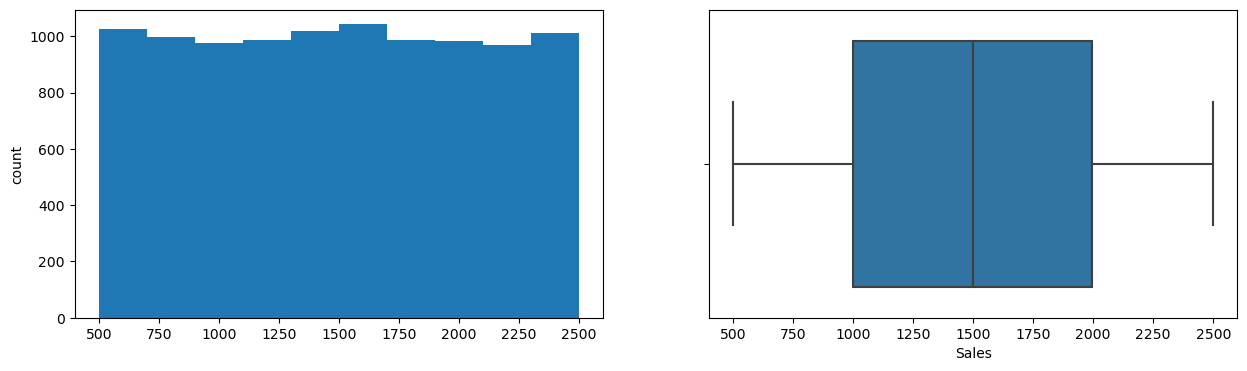

Discount
Skew : -0.03


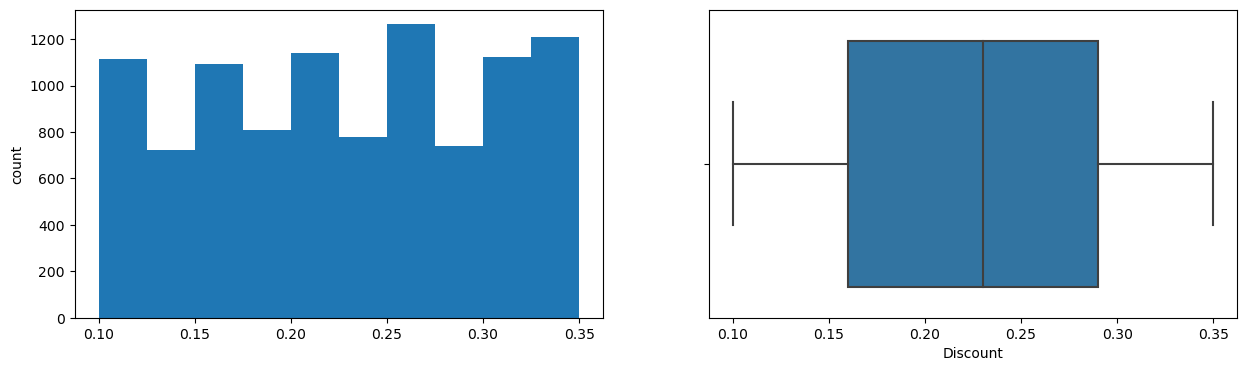

Profit
Skew : 0.77


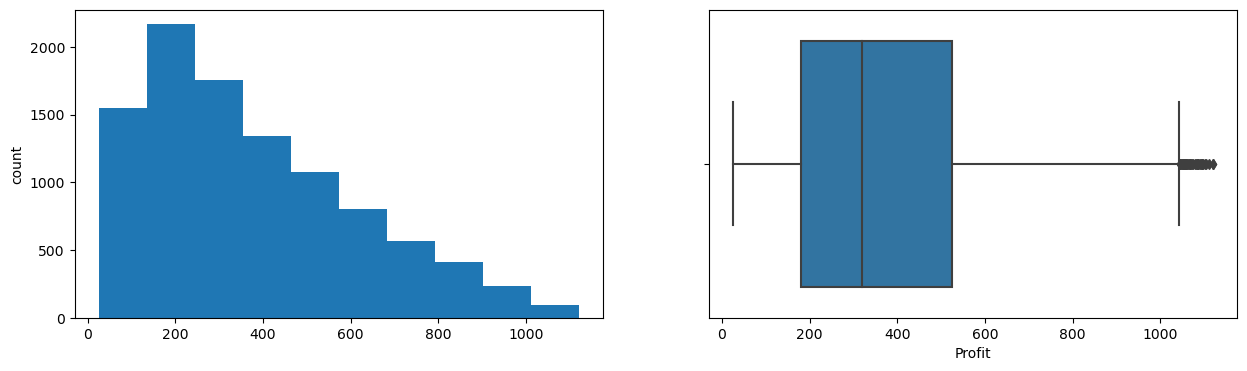

In [26]:
# checking for skewness and outliers in our numeric variable 

for col in num_cols:
    print(col)
    print('Skew :', round(data[col].skew(), 2))
    plt.figure(figsize = (15, 4))
    plt.subplot(1, 2, 1)
    data[col].hist(grid=False)
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    sns.boxplot(x=data[col])
    plt.show()

#
the above shows that DISCOUNT is left skewed and PROFIT is right skewed while SALES is skewness free.

before we deal with the skewness on our numerical variables, let's check a univariate analysis on our categorical variables.

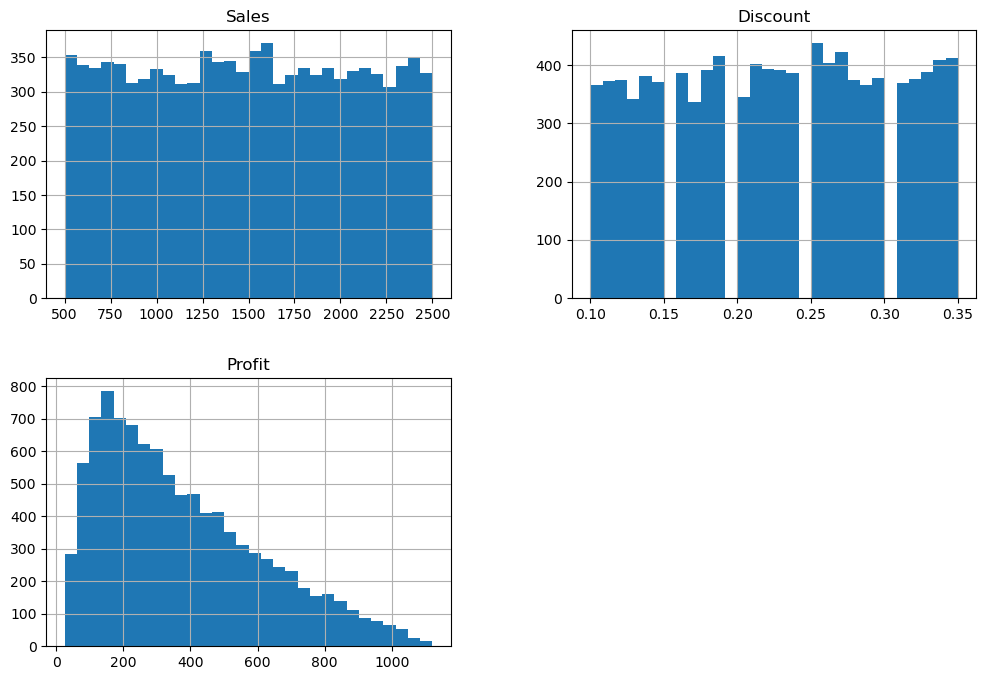

In [27]:
data.hist(bins = 30, figsize = (12, 8))
plt.show()

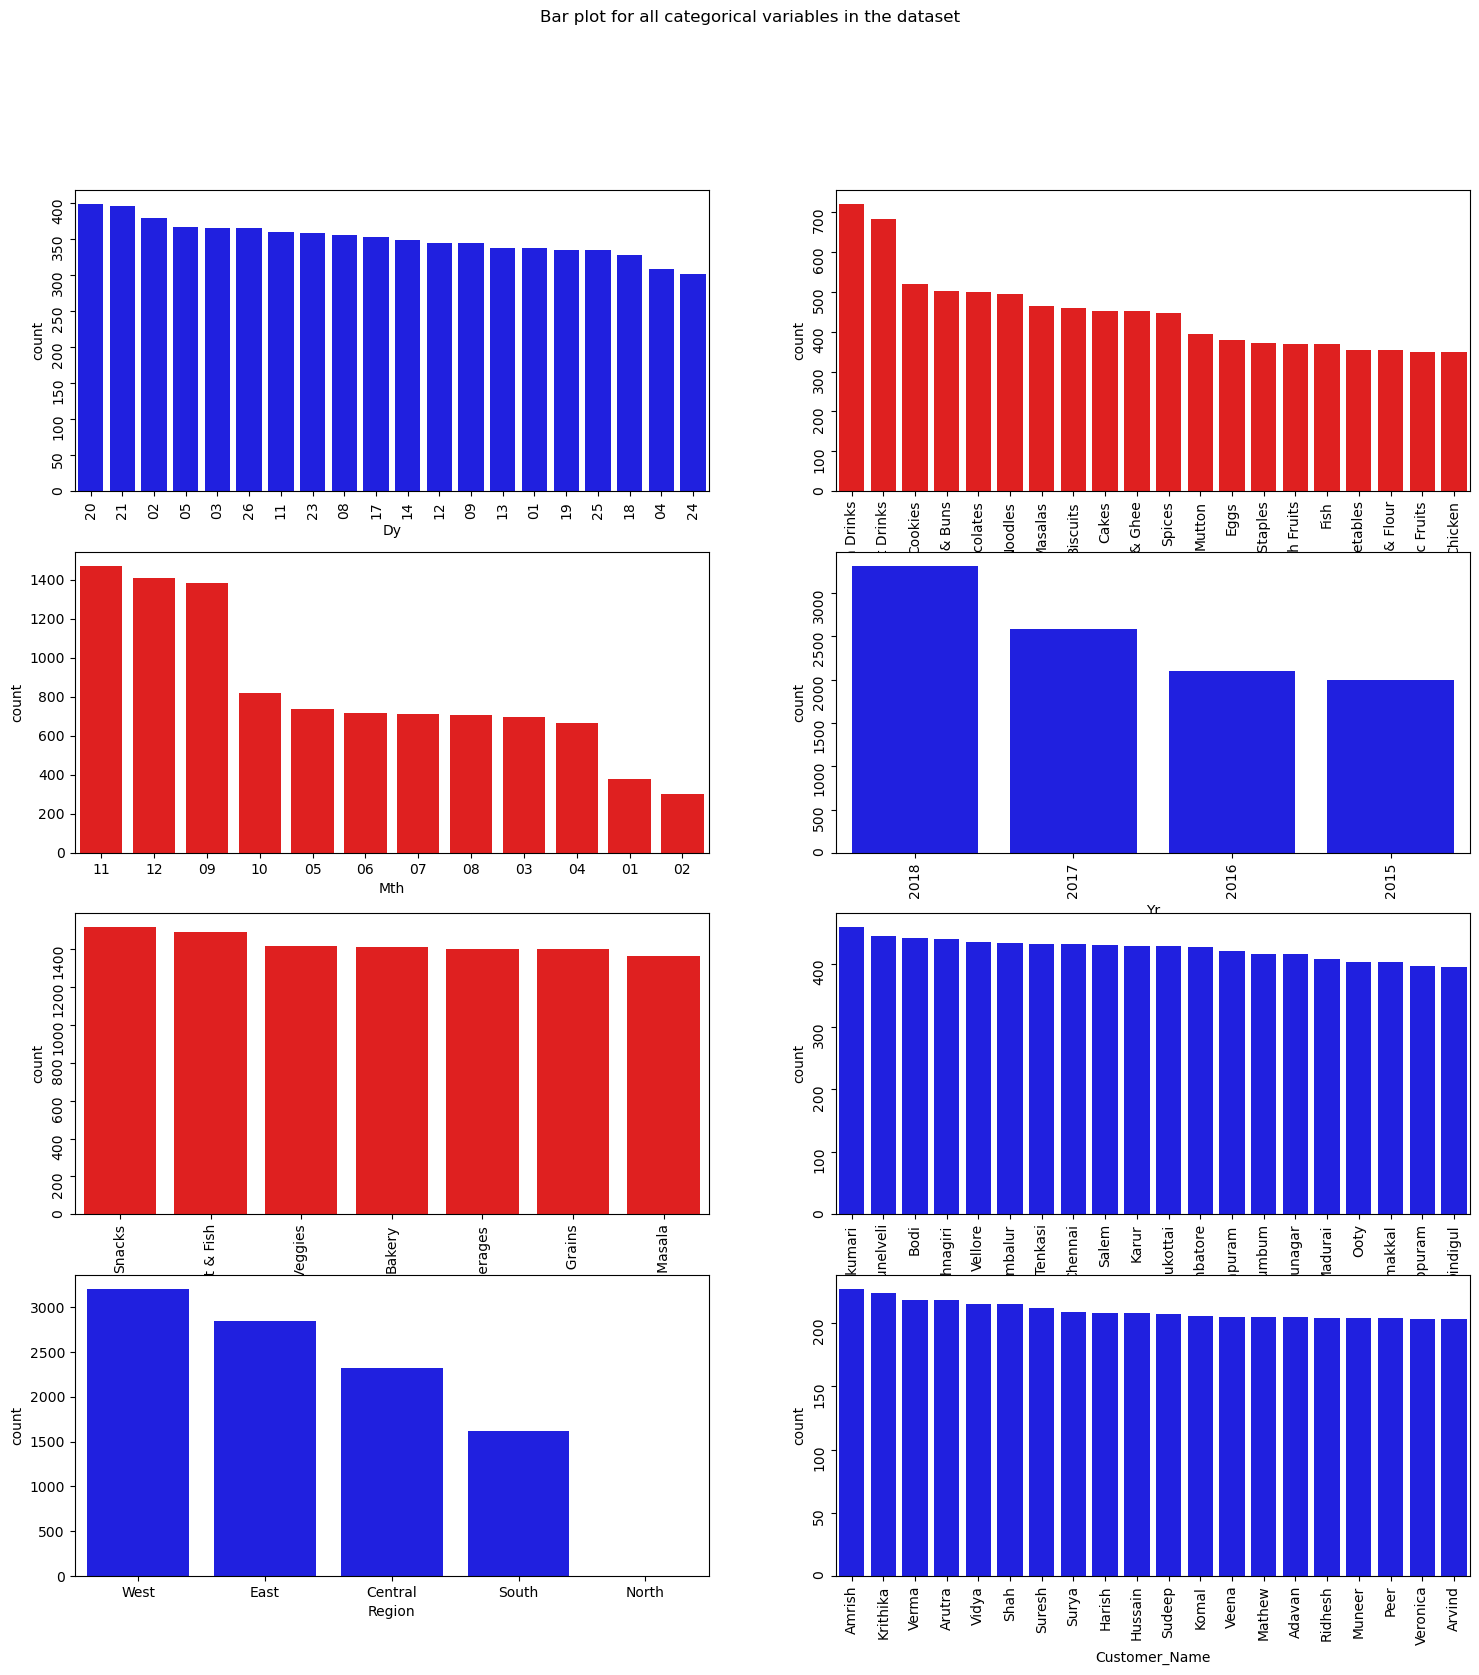

In [28]:
fig, axes = plt.subplots(4, 2, figsize = (18, 18))
fig.suptitle('Bar plot for all categorical variables in the dataset')

sns.countplot(ax = axes[0, 0], x = 'Dy', data = data, color = 'blue', 
              order = data['Dy'].value_counts().head(20).index);
sns.countplot(ax = axes[0, 1], x = 'Sub_Category', data = data, color = 'red', 
              order = data['Sub_Category'].value_counts().head(20).index);
sns.countplot(ax = axes[1, 0], x = 'Mth', data = data, color = 'red',
             order = data['Mth'].value_counts().head(20).index);
sns.countplot(ax = axes[1, 1], x = 'Yr', data = data, color = 'blue',
             order = data['Yr'].value_counts().head(20).index);
sns.countplot(ax = axes[2, 0], x = 'Category', data = data, color = 'red', 
              order = data['Category'].value_counts().head(20).index);
sns.countplot(ax = axes[2, 1], x = 'City', data = data, color = 'blue', 
              order = data['City'].value_counts().head(20).index);
sns.countplot(ax = axes[3, 0], x = 'Region', data = data, color = 'blue', 
              order = data['Region'].value_counts().head(20).index);
sns.countplot(ax = axes[3, 1], x = 'Customer_Name', data = data, color = 'blue', 
              order = data['Customer_Name'].value_counts().head(20).index);
axes[1][1].tick_params(labelrotation=90);
axes[2][0].tick_params(labelrotation=90);
axes[2][1].tick_params(labelrotation=90);
axes[0, 0].tick_params(labelrotation=90);
axes[0][1].tick_params(labelrotation=90);
axes[3, 1].tick_params(labelrotation=90);

#
from the diagrams above we now know that 
- Oil and Masala which is our least selling category has a sale  of 13%. 
-  we have 19% of sales in central region

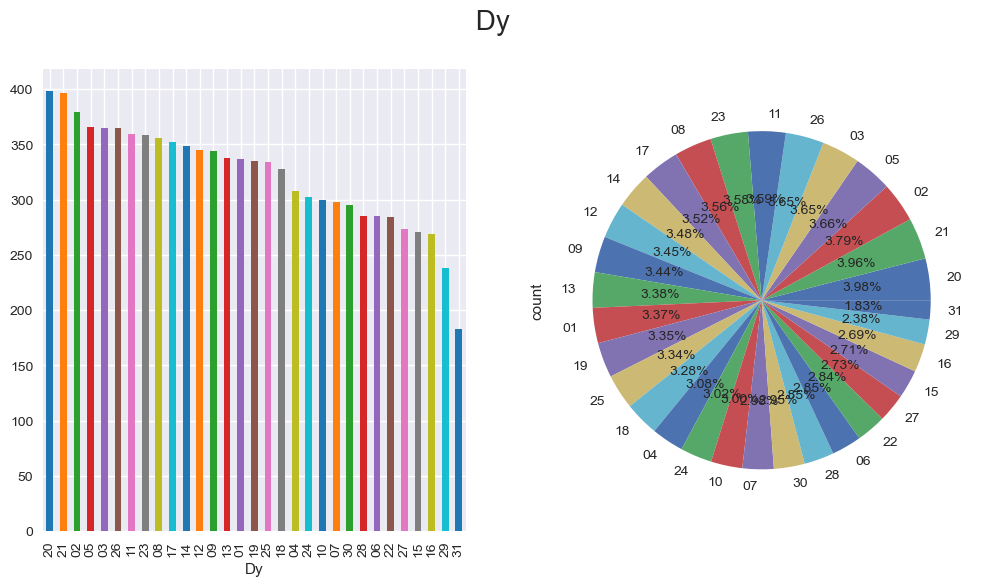

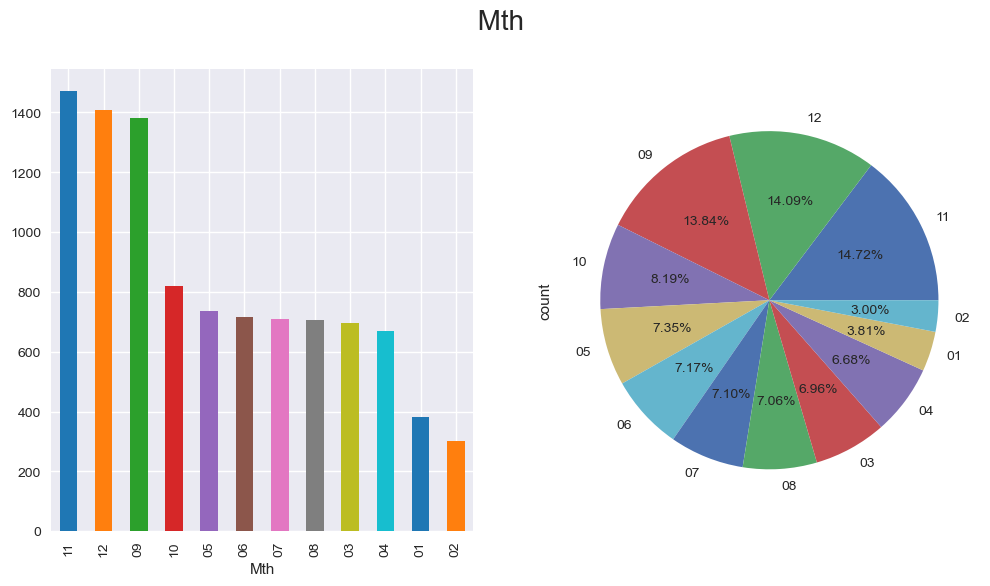

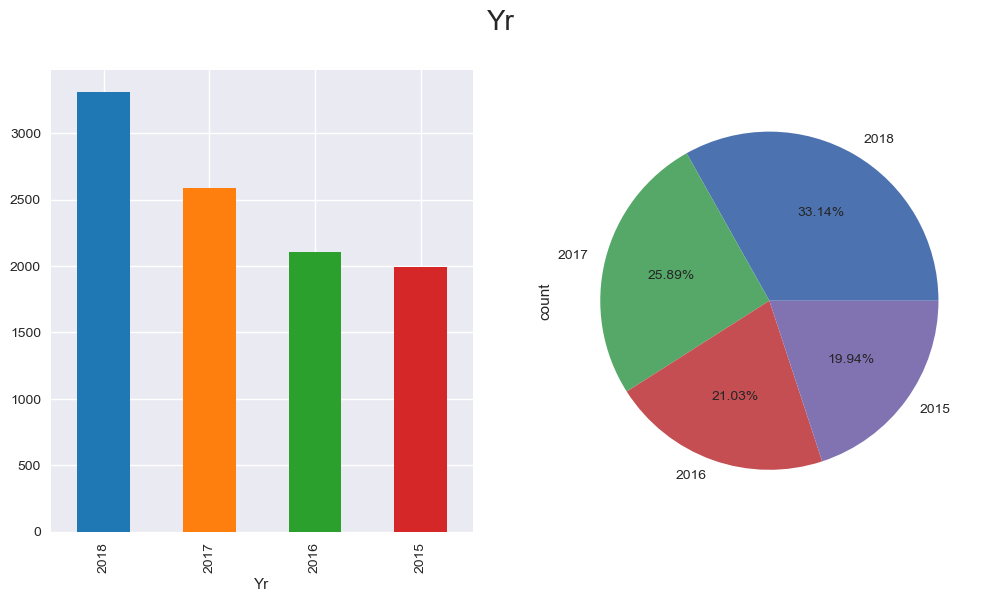

In [47]:

cols = ['Dy', 'Mth', 'Yr']

for i in cols:
    if i == 'Yr':
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Set figsize here
        fig.suptitle('Yr', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1, 2, 1)
        data['Yr'].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
        plt.subplot(1, 2, 2)
        data['Yr'].value_counts().plot(kind='pie', autopct="%.2f%%")
        plt.show()
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6))  # Set figsize here
        fig.suptitle(' ' + i + ' ', fontsize=20)
        plt.style.use('seaborn')
        plt.subplot(1, 2, 1)
        data[i].value_counts().plot(kind='bar', color=sns.color_palette("tab10"))
        plt.subplot(1, 2, 2)
        data[i].value_counts().plot(kind='pie', autopct="%.2f%%")
        plt.show()

#
from we the above charts;

- 19.9% of the total sales was made in 2015 while 33.14% was generated in 2018
- There's 7.25% rise in sales from year 2017 to 2018
- 14.72% -  highest selling month(November)
- 3% sales rate for Feburary, which is the least sales month, hereby shows the shop can give staffs break for this month. the shop can also close for a few days in this month if a break is required.

# Data Transformation
Before we proceed to Bi-variate Analysis, Univariate analysis demonstrated the data pattern as some variables to be transformed as some of our variables are still skewed

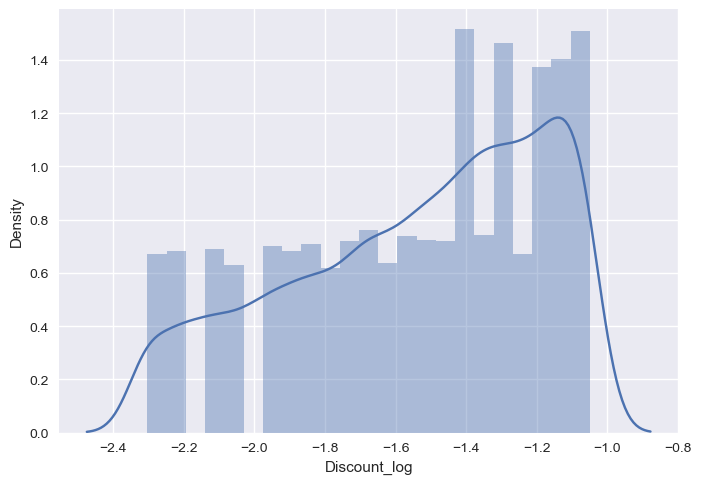

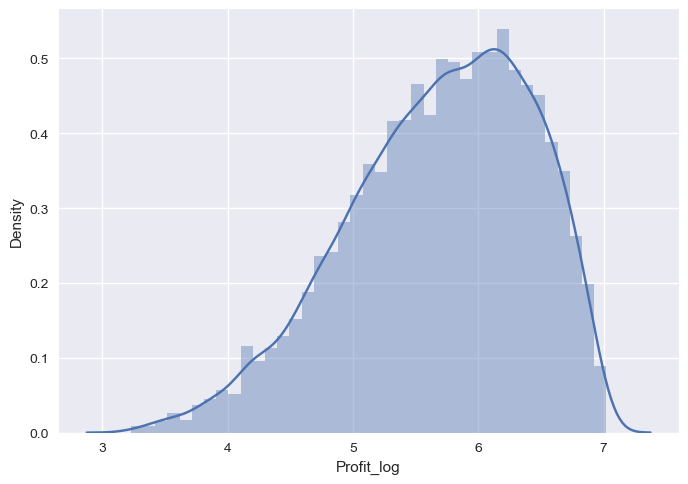

In [38]:
# Function for log transformation of the column
def log_transform(data,col):
    for colname in col:
        if (data[colname] == 1.0).all():
            data[colname + '_log'] = np.log(data[colname]+1)
        else:
            data[colname + '_log'] = np.log(data[colname])
log_transform(data,['Discount','Profit'])
#Log transformation of the feature 'Discount'
sns.distplot(data["Discount_log"], axlabel="Discount_log");
plt.show()
sns.distplot(data["Profit_log"], axlabel="Profit_log");
plt.show()

In [39]:
data

,Customer_Name,Category,Sub_Category,City,Region,Sales,Discount,Profit,State,Dy,Mth,Yr,Discount_log,Profit_log
0,Harish,Oil & Masala,Masalas,Vellore,North,1254,0.12,401.28,Tamil Nadu,08,11,2017,-2.120264,5.994659
1,Sudha,Beverages,Health Drinks,Krishnagiri,South,749,0.18,149.80,Tamil Nadu,08,11,2017,-1.714798,5.009301
2,Hussain,Food Grains,Atta & Flour,Perambalur,West,2360,0.21,165.20,Tamil Nadu,12,06,2017,-1.560648,5.107157
3,Jackson,Fruits & Veggies,Fresh Vegetables,Dharmapuri,South,896,0.25,89.60,Tamil Nadu,11,10,2016,-1.386294,4.495355
4,Ridhesh,Food Grains,Organic Staples,Ooty,South,2355,0.26,918.45,Tamil Nadu,11,10,2016,-1.347074,6.822687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Sudeep,"Eggs, Meat & Fish",Eggs,Madurai,West,945,0.16,359.10,Tamil Nadu,24,12,2015,-1.832581,5.883601
9990,Alan,Bakery,Biscuits,Kanyakumari,West,1195,0.26,71.70,Tamil Nadu,12,07,2015,-1.347074,4.272491
9991,Ravi,Food Grains,Rice,Bodi,West,1567,0.16,501.44,Tamil Nadu,06,06,2017,-1.832581,6.217484
9992,Peer,Oil & Masala,Spices,Pudukottai,West,1659,0.15,597.24,Tamil Nadu,16,10,2018,-1.897120,6.392319


# EDA Bivariate Analysis

Bivariate Analysis helps to understand how variables are related to each other and the relationship between dependent and independent variables present in the dataset.

* We will exclude the skewed variable in this analysis

<Figure size 1300x1700 with 0 Axes>

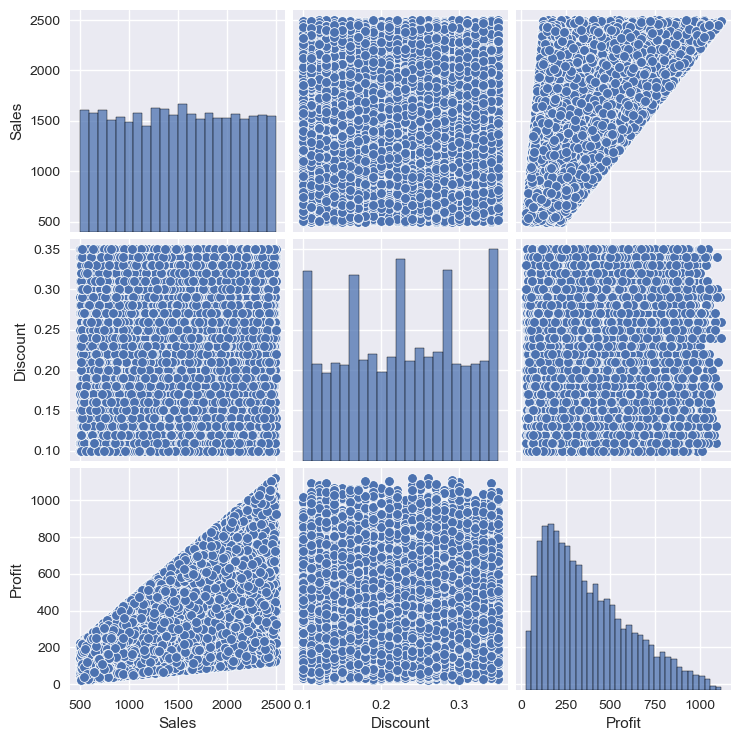

In [40]:
plt.figure(figsize=(13,17))
sns.pairplot(data=data.drop(['Discount_log','Profit_log'],axis=1))
plt.show()

#
- highest profit was made when discount was at 0.28
- as discount increases, profit decreases
- discount has no effect on sales

#
Bar Plot - A bar plot can be used to show the relationship between Categorical variables and continuous variables 

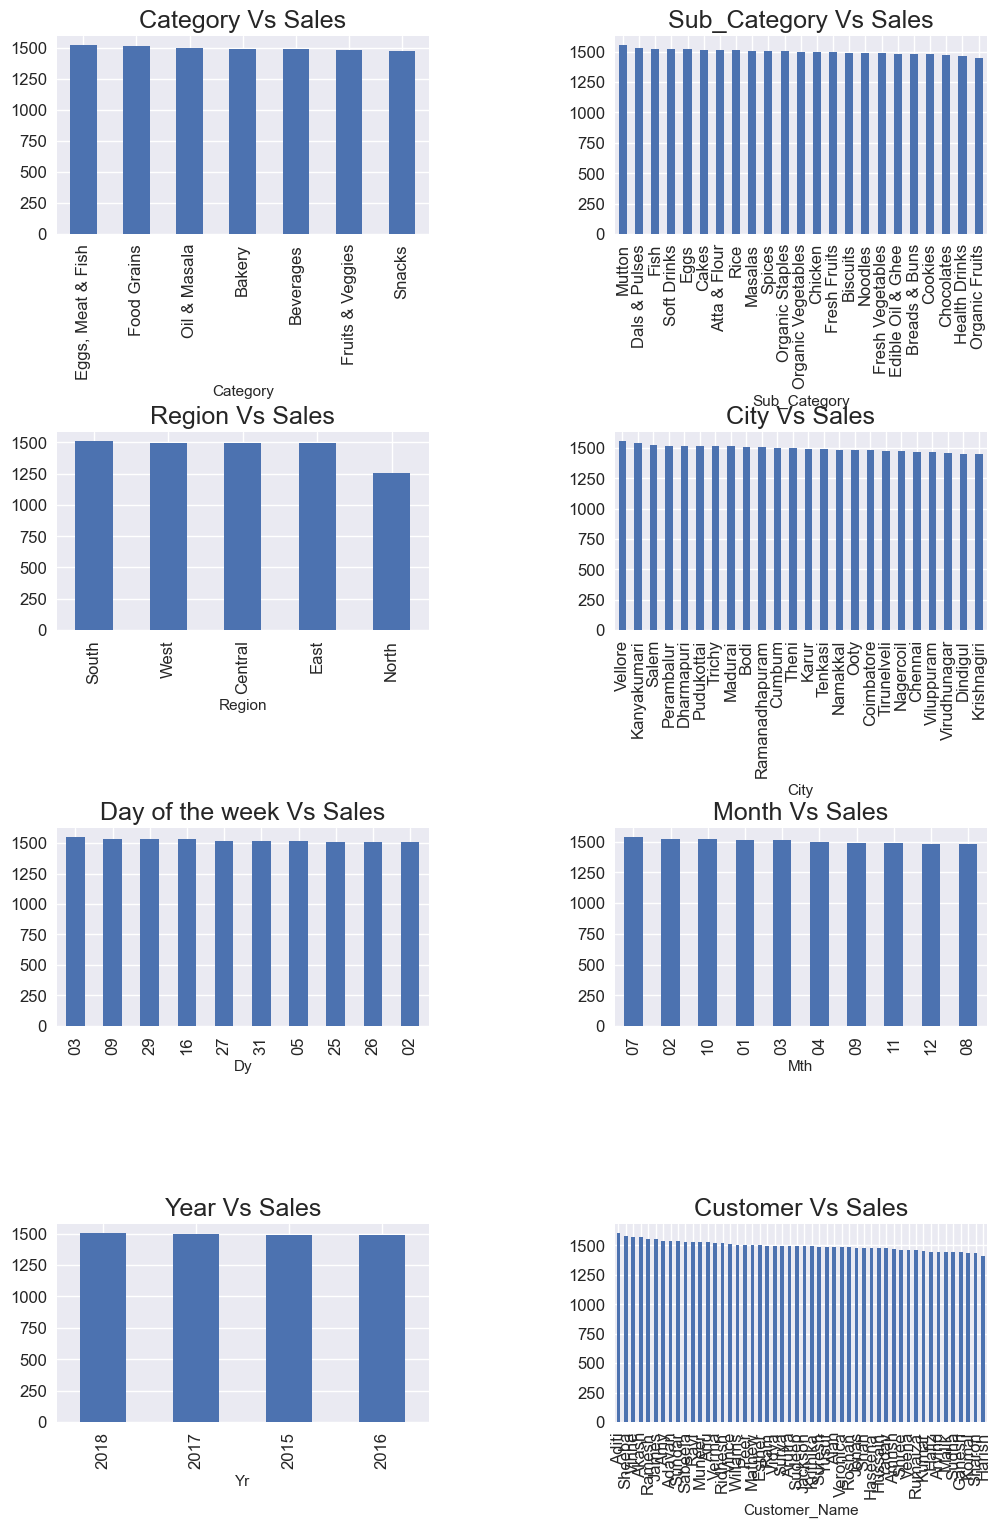

In [41]:
fig, axarr = plt.subplots(4, 2, figsize=(12, 18))
data.groupby('Category')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][0], fontsize=12)
axarr[0][0].set_title("Category Vs Sales", fontsize=18)
data.groupby('Sub_Category')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[0][1], fontsize=12)
axarr[0][1].set_title("Sub_Category Vs Sales", fontsize=18)
data.groupby('Region')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][0], fontsize=12)
axarr[1][0].set_title("Region Vs Sales", fontsize=18)
data.groupby('City')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[1][1], fontsize=12)
axarr[1][1].set_title("City Vs Sales", fontsize=18)
data.groupby('Dy')['Sales'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][0], fontsize=12)
axarr[2][0].set_title("Day of the week Vs Sales", fontsize=18)
data.groupby('Mth')['Sales'].mean().sort_values(ascending=False).head(10).plot.bar(ax=axarr[2][1], fontsize=12)
axarr[2][1].set_title("Month Vs Sales", fontsize=18)
data.groupby('Yr')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][0], fontsize=12)
axarr[3][0].set_title("Year Vs Sales", fontsize=18)
data.groupby('Customer_Name')['Sales'].mean().sort_values(ascending=False).plot.bar(ax=axarr[3][1], fontsize=12)
axarr[3][1].set_title("Customer Vs Sales", fontsize=18)
plt.subplots_adjust(hspace=1.0)
plt.subplots_adjust(wspace=.5)
sns.despine()

#sales_log = unit while sales = real sales value

# 
OBSERVATIONS:
    - Only Northern Region produces less than average sales

 # EDA Multivariate Analysis
 
 Multivariate analysis looks at more than two variables. Multivariate analysis is one of the most useful methods to determine relationships and analyze patterns for any dataset.
 - A heat map is widely been used for Multivariate Analysis

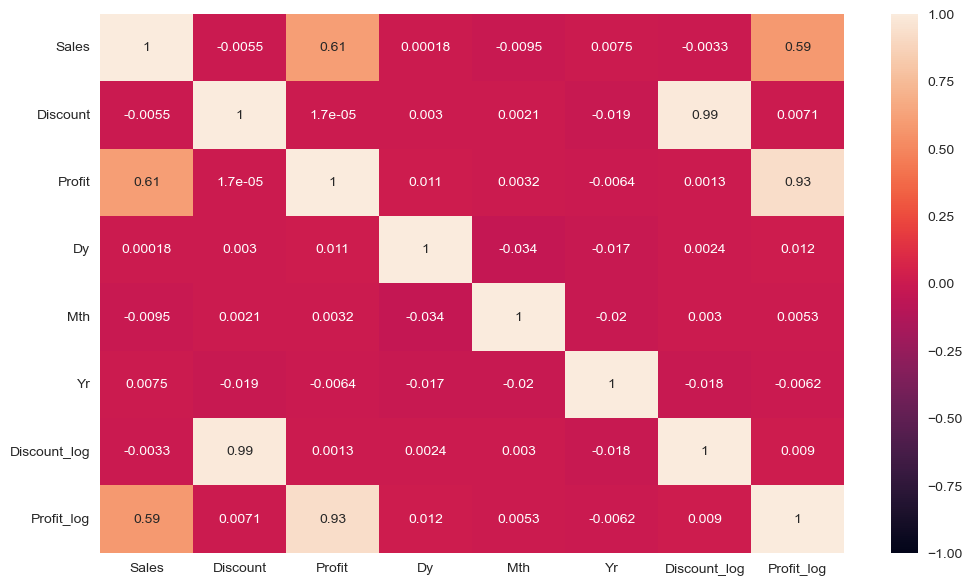

In [44]:
plt.figure(figsize=(12, 7))
sns.heatmap(data.drop(['State','Region', 'City', 'Sub_Category', 'Category', 'Customer_Name'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

#
OBSERVATION
 - The sales has a strong positive correlation to Profit 0.61, which seem to be the only strong correlation

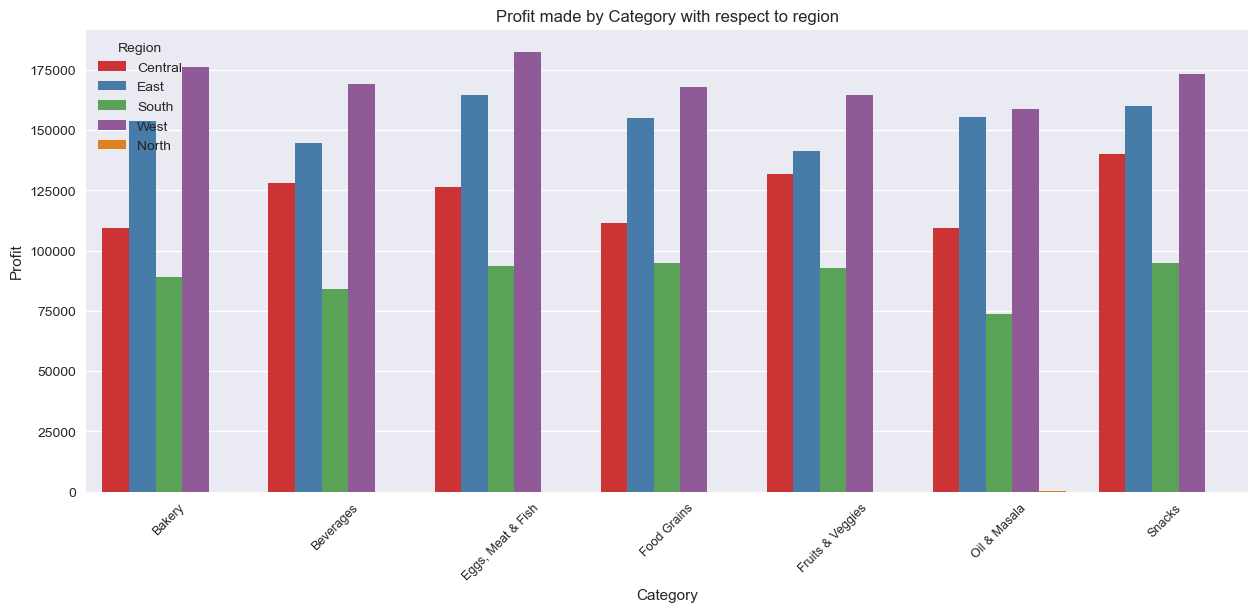

In [43]:

data_trans = data.groupby(['Category', 'Region'])[['Profit']].sum().reset_index()

plt.figure(figsize=(15,6))
sns.barplot(x=data_trans['Category'], y=data_trans['Profit'], hue=data_trans['Region'], ci=None, palette="Set1")
plt.title("Profit made by Category with respect to region")
plt.ylabel("Profit")
plt.xticks(rotation=45, fontsize = 9)
plt.show()

 # 
 The above output further shows how much the northern region don't affect sales in any category

In [ ]:
# Analysis by TOBI OLUWADAMILARE

# BUILDING A PREDICTIVE MODEL FOR THE DATASET

 * SINCE the only corellation we could deduce from tour previous analysis is between Profit and sales, we'd hereby create dummy for all important categorical values and recheck for correlation to get more important variables to juse for building the model.

In [ ]:
df = data.drop(['State'], axis=1)
df

# CREATING DUMMIES FOR CATEGORICAL VARIABLES

In [ ]:
# Use pandas get_dummies to create dummy variables
dummy1 = pd.get_dummies(data['Category'], dtype=int)
dummy1

In [ ]:
dummy2 = pd.get_dummies(data['Sub_Category'], dtype=int)
dummy2

In [ ]:
dummy3 = pd.get_dummies(data['Region'], dtype=int)
dummy3

In [ ]:
dummy4 = pd.get_dummies(data['City'], dtype=int)
dummy4

In [ ]:
# removing the variables we already created dummies for

df = df.drop(['City', 'Region', 'Sub_Category', 'Category'], axis = 1)

In [ ]:
df

In [ ]:
# further remove the the variables i have created a log for 

df = df.drop(['Order_ID', 'Discount', 'Profit'], axis = 1)
df

# JOINGING CREATED DUMMIES TO OUR DATAFRAME

In [ ]:
df = df.join(dummy1)
df = df.join(dummy2)
df = df.join(dummy3)
df = df.join(dummy4)

In [ ]:
df

In [ ]:
plt.figure(figsize=(50,50))
sns.heatmap(df.drop(['Customer_Name'],axis=1).corr(), annot = True, vmin = -1, vmax = 1)
plt.show()

In [ ]:
x = df.drop(['Profit_log', 'Customer_Name'], axis =1)
y = df["Profit_log"]

In [ ]:
x

In [ ]:
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size = 0.2, random_state = 2)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
stndrd = StandardScaler()
x_train = stndrd.fit_transform(x_train)
x_test = stndrd.transform(x_test)

In [ ]:
x_test

In [ ]:
x_train

In [ ]:
from sklearn.neighbors import KNeighborsClassifier as knn
from sklearn.linear_model import LogisticRegression as LGR
from mlxtend.feature_selection import ExhaustiveFeatureSelector
from mlxtend.plotting import plot_sequential_feature_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

In [ ]:
# I'd use linear regression as model since our dependent variable is continious 


model = LinearRegression()

In [ ]:
efs = ExhaustiveFeatureSelector( model,
                                min_features = 3,
                                max_features = 10,
                                scoring = 'accuracy',
                                cv = 2)

In [ ]:
efs = efs.fit(x, y)

In [ ]:
# Print selected features
print("Best features:", efs.best_feature_names_)